<a href="https://colab.research.google.com/github/Amri1003/Machine_Learning_Projects/blob/main/BreastCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import library

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

print('imported')






imported


In [3]:
# load the dataset

data=pd.read_csv('/content/Breast_cancer_dataset.csv')

print('loaded')






loaded


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# dropping the unnamed column(not required), axis is 1 as column is being dropped
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)






In [6]:
# distribution of diagnosis variable as its object type

data['diagnosis'].value_counts()






,count
diagnosis,
B,357
M,212


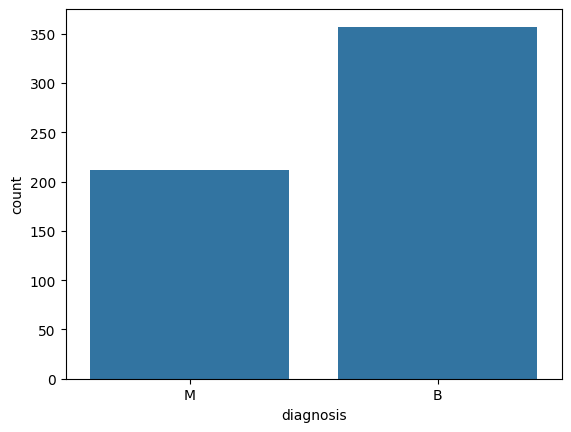

In [7]:
sns.countplot(x=data['diagnosis'])

plt.show()






In [8]:
# map target - 0 and 1, change diagnosis (object type) to binary

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

data['diagnosis']=encoder.fit_transform(data['diagnosis'])

data['diagnosis']






,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


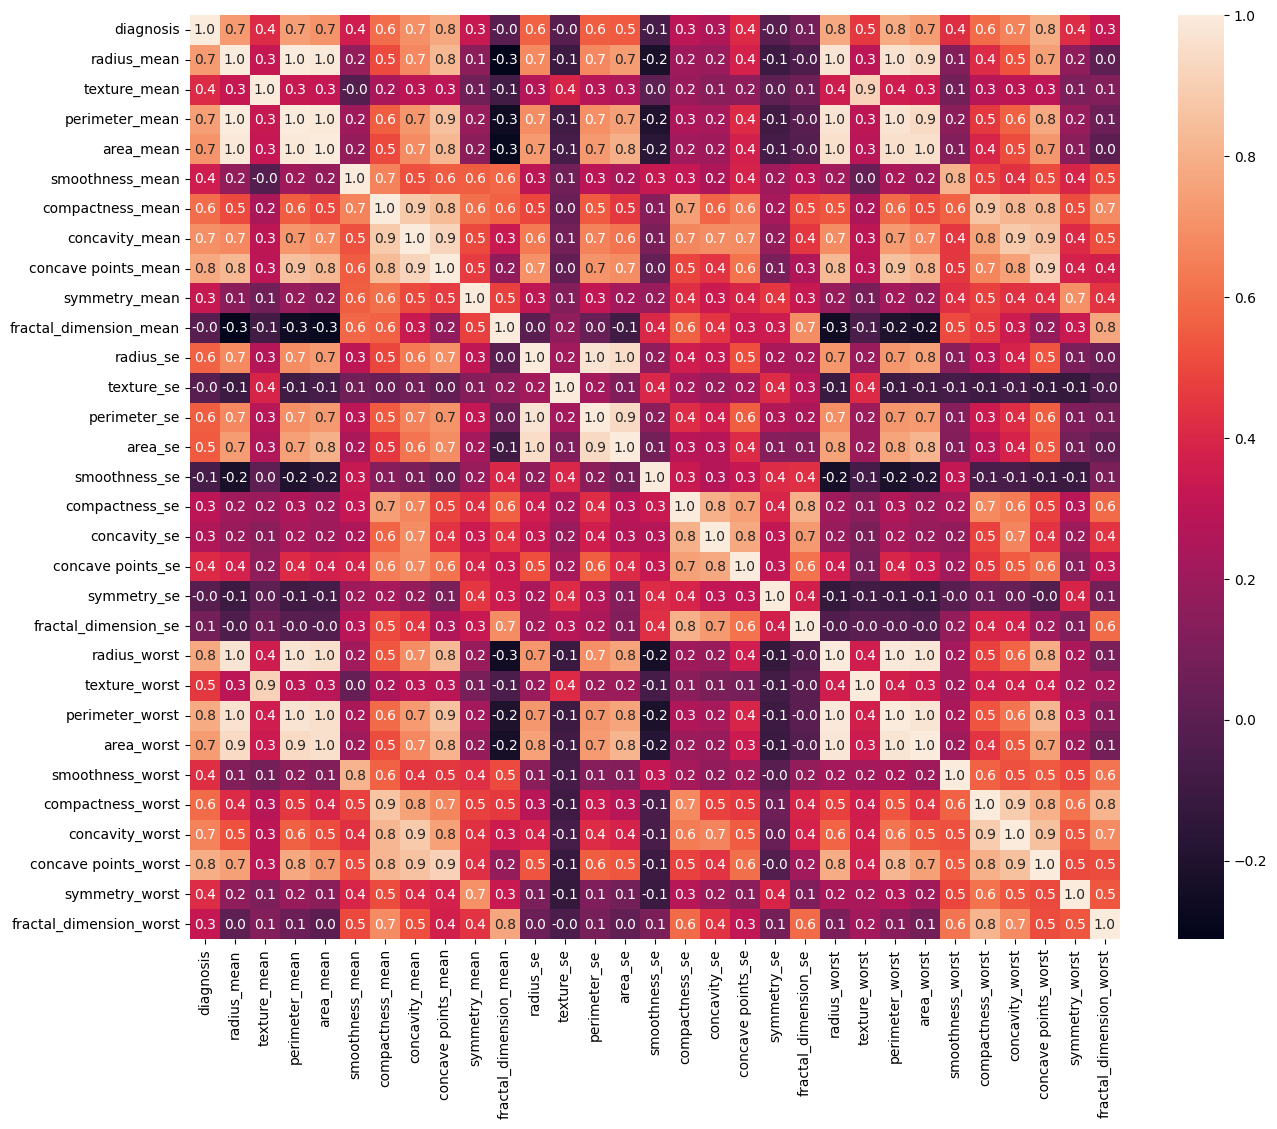

In [9]:
# Visualize the corr with help from heatmap, co relation helps in feature selection

plt.figure(figsize=(15,12))

sns.heatmap(data.corr(numeric_only=True),annot=True,fmt='.1f')

plt.show()






In [10]:
# apply machine learning
# create indep var & dep var

X=data.drop('diagnosis',axis=1)  # drop diagnosis col from X as its output data

y=data['diagnosis']   # diagnosis is as output data






In [11]:
# create training set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)




In [12]:
print ('x_train shape: ',X_train.shape)

print('x_test shape: ',X_test.shape)
print ('y_train shape: ',y_train.shape)


print('y_test shape: ',y_test.shape)


x_train shape:  (455, 30)
x_test shape:  (114, 30)
y_train shape:  (455,)
y_test shape:  (114,)


In [13]:
X_train


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


combine the sequence of operation
1. create pipeline -- pipeline combines preprocessing and model training

In [14]:
# define the pipeline

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

print('imported')






imported


In [15]:
pipeline=Pipeline([('scaler',StandardScaler()),

                  ('log_reg',LogisticRegression(max_iter=10000,random_state=42))])

pipeline.fit(X_train,y_train)

print('Training completed')






Training completed


In [16]:
y_pred_test=pipeline.predict(X_test)






In [17]:
y_pred_test






array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [18]:
# performance evaluation matrix or confusion matrix to check accuracy
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_pred_test))











[[70  1]
 [ 2 41]]


In [19]:
print(accuracy_score(y_test,y_pred_test)) # tn+tp/tn+tp+fp+fn






0.9736842105263158


In [20]:
y_pred_train=pipeline.predict(X_train)
print(accuracy_score(y_train,y_pred_train))

0.9868131868131869


Accuracy is fine, model is performing well.
To explain the model,only accuracy score is not sufficient as our model is getting trained on 'highly accurate data' so accuracy is coming great here!!
We will calculate few more terms.
Accuracy is useful when data is balanced not "all good type."



For imbalance data F1 score is beneficial.
Precision --> Coorectness of Positive prediction
Recall --> To Find positive ex. sensitive application
F1 score --> combination of prec n recall

In [21]:
# checking values for precision, recall and F1 score

from sklearn.metrics import recall_score,precision_score,f1_score,classification_report

print('precison',precision_score(y_test,y_pred_test))

print('recall',recall_score(y_test,y_pred_test))

print('f1-score',f1_score(y_test,y_pred_test))






precison 0.9761904761904762
recall 0.9534883720930233
f1-score 0.9647058823529412


In [22]:
# Classification report as consolidated form , support is number of samples
print(classification_report(y_test,y_pred_test))






              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



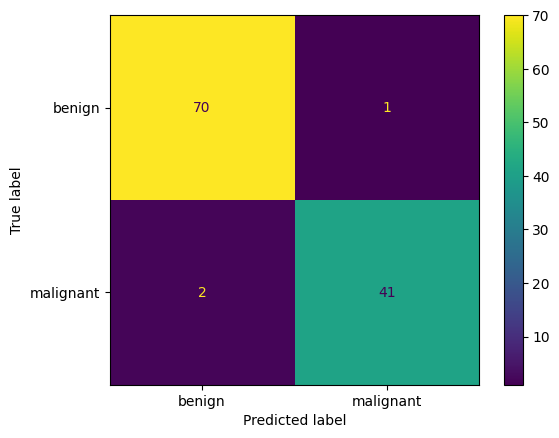

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred_test)

cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['benign','malignant'])

cm_display.plot()

plt.show()






In [24]:
#check y_pred_test
y_pred_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [25]:
y_pred_test_prob=pipeline.predict_proba(X_test)[:,1]

print(y_pred_test_prob)






[1.13590250e-01 9.99990991e-01 9.96920905e-01 5.10134225e-04
 6.06389713e-05 1.00000000e+00 9.99999998e-01 9.65096937e-01
 3.79342140e-01 7.59402734e-04 4.98717826e-02 9.87592879e-01
 6.07381873e-03 8.56069117e-01 1.62175599e-03 9.99259818e-01
 1.85245908e-03 1.11662359e-05 8.18375684e-07 9.99998883e-01
 8.41633901e-02 9.74778299e-03 9.99999996e-01 7.89186669e-05
 1.13874333e-03 5.84587240e-04 1.07444521e-03 5.97518345e-03
 2.85311713e-03 9.99991817e-01 5.17409813e-04 1.48760128e-04
 2.16094439e-03 5.49413839e-03 1.40706288e-04 2.42334266e-03
 9.42415985e-01 2.89870352e-03 9.99911214e-01 4.81363757e-02
 7.12433090e-05 9.99593392e-01 2.46640626e-03 9.63884505e-04
 1.99892051e-02 7.15547342e-02 3.98571939e-04 4.90625569e-04
 3.04698010e-02 6.14016147e-04 9.99879654e-01 9.99999947e-01
 3.08211520e-01 1.32293769e-02 2.73627242e-05 9.54524359e-03
 1.12878558e-04 1.00000000e+00 8.35573090e-01 1.39239947e-04
 5.01360363e-03 9.99999551e-01 9.99999999e-01 3.11060472e-02
 8.29093869e-04 1.297992

In [26]:
result_df=pd.DataFrame({'Actual_label':y_test,'Pred_label':y_pred_test,'pred_prob':y_pred_test_prob})

result_df






,Actual_label,Pred_label,pred_prob
204,0,0,0.113590
70,1,1,0.999991
131,1,1,0.996921
431,0,0,0.000510
540,0,0,0.000061
...,...,...,...
486,0,0,0.032195
75,1,1,0.999323
249,0,0,0.001308
238,0,1,0.542700


In [27]:
# ROC curve shows how binary classifier performs across all threshold levels.
# it plots y-axis TPR(True positive rate)-Recall-Tp/Tf+Fn) vs FPR (False positive rate Fp/Fp+Tn)
# calculate ROC

from sklearn.metrics import roc_curve,auc

fpr,tpr,thresh=roc_curve(y_test,y_pred_test_prob)






In [28]:
auc_score=auc(fpr,tpr)

print('AUC Score',auc_score)






AUC Score 0.99737962659679


In [29]:
print(thresh)






[           inf 1.00000000e+00 7.76680319e-01 5.42699821e-01
 4.84826685e-01 1.13099081e-01 8.41633901e-02 8.18375684e-07]


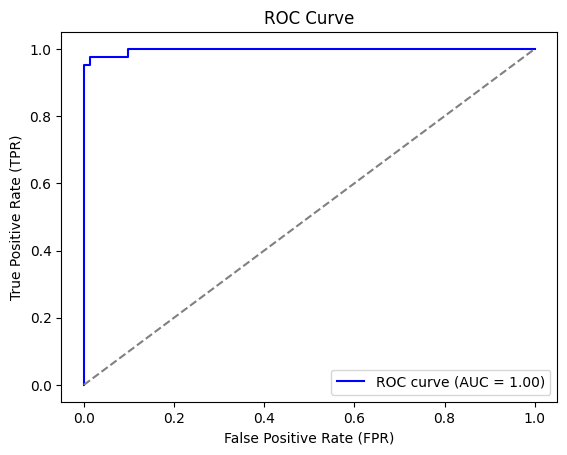

In [30]:
# plot the curve

# Calculate AUC

roc_auc = auc(fpr, tpr)

# Plot ROC curve

plt.figure()

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line

plt.xlabel('False Positive Rate (FPR)')

plt.ylabel('True Positive Rate (TPR)')

plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()






In [31]:
# Compute the Area Under the Curve (AUC) for the ROC curve
# ROC explores many threshold

roc_auc = auc(fpr, tpr)

# Compute Youden's J statistic for each threshold

youden_j = tpr - fpr

optimal_threshold_index = np.argmax(youden_j)   # best one to choose is called optimal

optimal_threshold = thresh[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")






Optimal Threshold: 0.4848


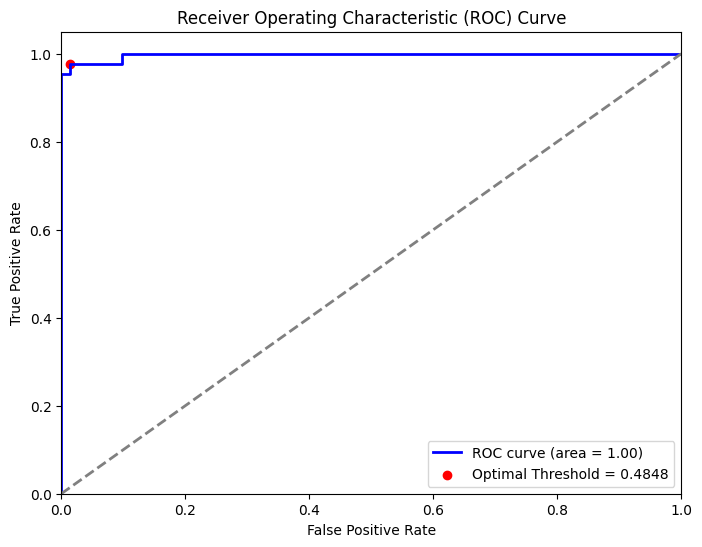

In [32]:
# Plot the ROC curve with the optimal threshold marked

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='lower right')

plt.show()




